In [27]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 

In [28]:
import pickle 
with open('risco_credito.pkl', 'rb') as f: 
    X_risco_credito, y_risco_credito = pickle.load(f)

In [29]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [30]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [31]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')#criando a árvore e passando a entropia como critério 
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [32]:
arvore_risco_credito.feature_importances_ #retorna a importância de cada um dos atributos


array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

[Text(0.5555555555555556, 0.9166666666666666, 'X[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.3333333333333333, 0.75, 'X[0] <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.2222222222222222, 0.5833333333333334, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.25, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5555555555555556, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.

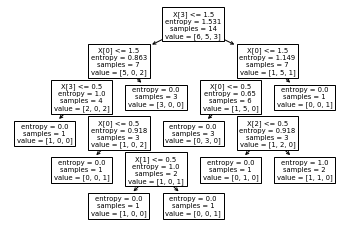

In [33]:
from sklearn import tree #plotando a arvore 
tree.plot_tree(arvore_risco_credito)

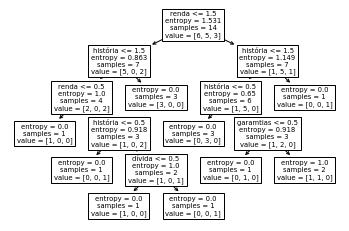

In [34]:
#melhorando a visualização pt1
previsores = ['história', 'dívida', 'garamtias', 'renda'] 
tree.plot_tree(arvore_risco_credito, feature_names=previsores); #para colocar o nome dos previsores na árvore, ; para tirar o texto

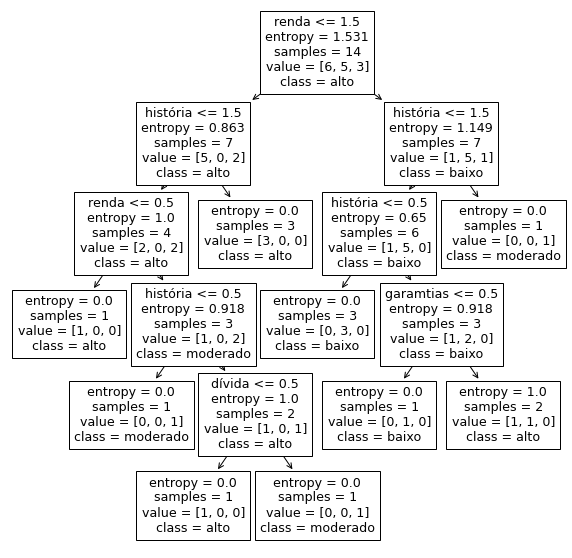

In [35]:
#melhorando a visualização pt2 
previsores = ['história', 'dívida', 'garamtias', 'renda'] 
figura, eixos= plt.subplots(nrows=1, ncols=1, figsize=(10,10))#para melhor o tamanho da figura
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names= arvore_risco_credito.classes_); #para colocar o nome das classificações


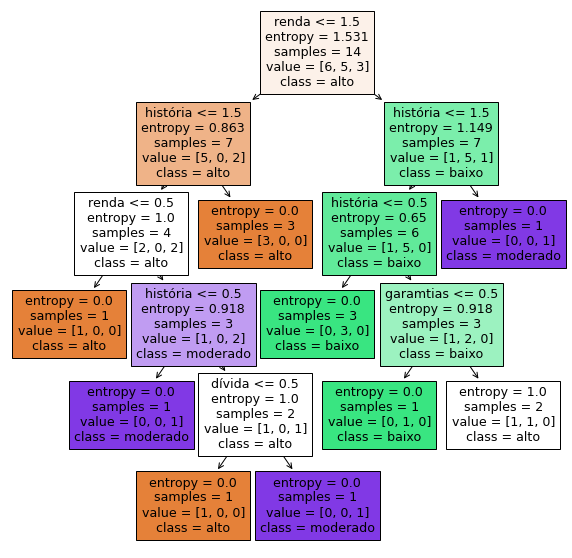

In [36]:
#melhorando a visualização pt3 
previsores = ['história', 'dívida', 'garamtias', 'renda'] 
figura, eixos= plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names= arvore_risco_credito.classes_, filled=True); #adiciona uma coloração a arvore

In [37]:
#mesmos usados no algoritmo naive
#história boa (0), dívida alta (0), garantia nehuma (1), renda > 35 (2)
#história ruim (2), dívida alta (0), garantia adequada (0), renda < 15 (0)
previsao = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)